In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ft2font
import AuxFunctions

In [2]:
#importing and using necessary files
config_file='./YOLO_files/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='./YOLO_files/frozen_inference_graph.pb'
#Tenserflow object detection model
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [3]:
#Reading Coco dataset
classLabels=[]
filename='./YOLO_files/yolo3.txt'
with open(filename,'rt') as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')

print("Number of Classes")
print(len(classLabels))
print("Class labels")
print(classLabels)


Number of Classes
80
Class labels
['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [4]:
#Model training
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001C9100336D0>

We will retrive information such as class index (object), confidence (accuracy level) and bbox (location co-ordinates).

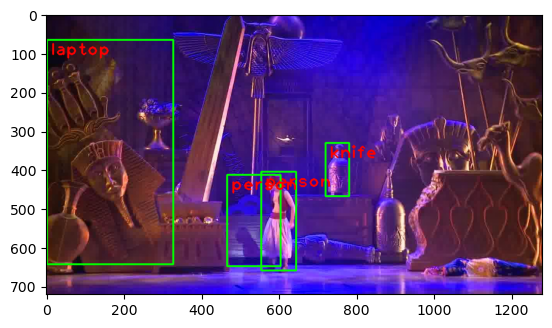

In [10]:
img = cv2.imread('./datasets/Alladin/img/00042.jpg')
#object detection
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)
#plotting boxes
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (0, 255, 0), 3)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 0, 255), thickness=3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [84]:
def YoloPrediction(filepath):
    img = cv2.imread(filepath)
     #object detection
    ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)
               #plotting boxes
    font_scale = 3
    font = cv2.FONT_HERSHEY_PLAIN
    for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
           if ClassInd < 80:
                cv2.rectangle(img, boxes, (0, 255, 0), 3)
                cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 0, 255), thickness=3)
                plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [76]:
def objectDetection(dataset, maxFramesShow = 600, showEveryX = 10):
    directory = os.path.join("datasets",dataset, "img")
    
    framesShow = min(maxFramesShow, len(os.listdir(directory))) 
    i = 0
    for filename in os.listdir(directory)[1:maxFramesShow]:
        filepath = os.path.join(directory, filename)
        
        if showEveryX != 0 and i % showEveryX == 0 :
            YoloPrediction(filepath)
           
        i += 1

AttributeError: 'tuple' object has no attribute 'flatten'

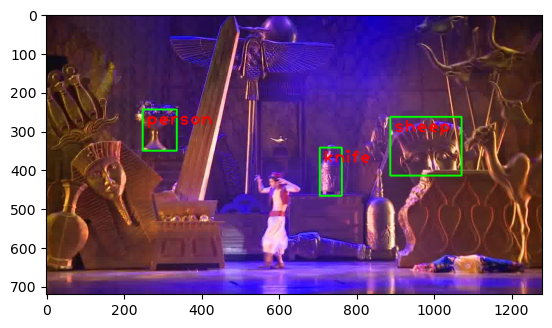

In [77]:
objectDetection('Alladin', maxFramesShow=600,showEveryX=10)